# Desafio Final - Previsão de Bullying
## Squad Hedy Lamar:
- Ingrid Demarchi Fernandes
- Julyana Facundes de Paula Ferreira
- Ludimilla Correia Aguilhari
- Márcia Jandira Baptista de Almeida
- Maryllian de Albuquerque Vieira

---


## Divisão de Atividades:
- Limpeza e Tratamento dos Dados: Maryllian de A. Vieira e Ludimilla C. Aguilhari
- Análise e Correlações das Variáveis Numéricas: Julyana Facundes
- Análise e Correlações das Variáveis Categóricas: Maryllian de A. Vieira e Ludimilla C. Aguilhari
- Visualizações Gráficas (Histogramas e Boxplots por Gênero e Idade): Márcia Almeida

# Exploração, limpeza e transformação dos dados

## Importação e carregamento do dataset

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
file_id = '1d9NYz67RGupQlx16Mu-IgTtRHm8pCNdL'

# URL para baixar o arquivo CSV
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Ler o CSV diretamente no pandas
bullying = pd.read_csv(download_url, sep=';')

# Exibir o dataframe
bullying.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


## Análises iniciais

In [ ]:
# Informações gerais sobre o dataset
bullying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [ ]:
# Estatísica da variável numérica
bullying.describe()

,record
count,56981.000000
mean,28535.389832
std,16479.971553
min,1.000000
25%,14263.000000
50%,28522.000000
75%,42804.000000
max,57095.000000


In [ ]:
# Verificando valores nulos
bullying.isnull().sum()

,0
record,0
Bullied_on_school_property_in_past_12_months,0
Bullied_not_on_school_property_in_past_12_months,0
Cyber_bullied_in_past_12_months,0
Custom_Age,0
Sex,0
Physically_attacked,0
Physical_fighting,0
Felt_lonely,0
Close_friends,0


In [ ]:
# Verificando valores ausentes
bullying.isna().sum()

,0
record,0
Bullied_on_school_property_in_past_12_months,0
Bullied_not_on_school_property_in_past_12_months,0
Cyber_bullied_in_past_12_months,0
Custom_Age,0
Sex,0
Physically_attacked,0
Physical_fighting,0
Felt_lonely,0
Close_friends,0


In [ ]:
# Nome das colunas
columns = bullying.columns
print(columns)

Index(['record', 'Bullied_on_school_property_in_past_12_months',
       'Bullied_not_on_school_property_in_past_12_months',
       'Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex',
       'Physically_attacked', 'Physical_fighting', 'Felt_lonely',
       'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Most_of_the_time_or_always_felt_lonely',
       'Missed_classes_or_school_without_permission', 'Were_underweight',
       'Were_overweight', 'Were_obese'],
      dtype='object')


In [ ]:
# Categorias de cada coluna
for column in columns:
    unique_values = bullying[column].unique()
    print(f"Valores únicos em '{column}': {unique_values}")

Valores únicos em 'record': [    1     2     3 ... 57093 57094 57095]
Valores únicos em 'Bullied_on_school_property_in_past_12_months': ['Yes' 'No' ' ']
Valores únicos em 'Bullied_not_on_school_property_in_past_12_months': ['Yes' 'No' ' ']
Valores únicos em 'Cyber_bullied_in_past_12_months': [' ' 'No' 'Yes']
Valores únicos em 'Custom_Age': ['13 years old' '14 years old' '16 years old' '12 years old'
 '15 years old' '11 years old or younger' '17 years old' ' '
 '18 years old or older']
Valores únicos em 'Sex': ['Female' 'Male' ' ']
Valores únicos em 'Physically_attacked': ['0 times' '1 time' '12 or more times' '4 or 5 times' '2 or 3 times'
 '10 or 11 times' '8 or 9 times' '6 or 7 times' ' ']
Valores únicos em 'Physical_fighting': ['0 times' '2 or 3 times' '1 time' '4 or 5 times' '6 or 7 times'
 '8 or 9 times' '10 or 11 times' ' ' '12 or more times']
Valores únicos em 'Felt_lonely': ['Always' 'Never' 'Rarely' 'Sometimes' 'Most of the time' ' ']
Valores únicos em 'Close_friends': ['2' '3 

In [ ]:
# Criando cópia para o tratamento
bullying_copy = bullying.copy()

In [ ]:
# Removendo os espaços em branco, substituindo por NaN
bullying_copy.replace(' ', np.nan, inplace=True)

In [ ]:
bullying_copy.head(20)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,NaN
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,NaN,NaN,NaN
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,NaN,NaN,NaN
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,No,No,No
6,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No,NaN,NaN,NaN
7,8,No,No,No,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,No,No,NaN,NaN,NaN
8,9,No,No,No,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes,NaN,NaN,NaN
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,NaN,NaN,NaN


In [ ]:
bullying_copy.isna().sum().sort_values()

,0
record,0
Custom_Age,108
Physically_attacked,240
Physical_fighting,268
Most_of_the_time_or_always_felt_lonely,366
Felt_lonely,366
Bullied_not_on_school_property_in_past_12_months,489
Sex,536
Cyber_bullied_in_past_12_months,571
Close_friends,1076


Usando os métodos para verificar valores nulos ou ausentes, não foi possível identifica-los. Contudo, verificando as categorias de cada variável notamos que algumas estão preenchidas com **espaço em branco**.

Logo, a decisão foi de transforma-los em **NaN** para posteriores análises. Por se tratar de uma pesquisa com preenchimento voluntário, algumas perguntas foram deixadas em branco.


# Análise de Correlação (Matriz de Correlação - Variáveis Numéricas)

###Calcule a matriz de correlação para todas as variáveis numéricas e Identifique as correlações mais fortes e mais fracas

In [ ]:
# Convertendo as variáveis categóricas em binário para análise
def convert_to_binary(col):
    if col.dtypes == 'object' and set(col.dropna().unique()).issubset({'Yes', 'No'}):
        return col.map({'Yes': 1, 'No': 0})
    return col

bullying_2 = bullying_copy.apply(convert_to_binary)

print(bullying_2)

       record  Bullied_on_school_property_in_past_12_months  \
0           1                                           1.0   
1           2                                           0.0   
2           3                                           0.0   
3           4                                           0.0   
4           5                                           0.0   
...       ...                                           ...   
56976   57091                                           0.0   
56977   57092                                           0.0   
56978   57093                                           0.0   
56979   57094                                           0.0   
56980   57095                                           0.0   

       Bullied_not_on_school_property_in_past_12_months  \
0                                                   1.0   
1                                                   0.0   
2                                                   0.0   
3      

In [ ]:
def extract_age(value):
    if isinstance(value, str):  # Verifica se é uma string
        return int(''.join(filter(str.isdigit, value)))  # Extrai números e converte para inteiro
    return None  # Retorna None para valores inválidos ou nulos

# Aplicar a função na coluna 'Idade'
bullying_2['Custom_Age'] = bullying_2['Custom_Age'].apply(extract_age)

print(bullying_2)

       record  Bullied_on_school_property_in_past_12_months  \
0           1                                           1.0   
1           2                                           0.0   
2           3                                           0.0   
3           4                                           0.0   
4           5                                           0.0   
...       ...                                           ...   
56976   57091                                           0.0   
56977   57092                                           0.0   
56978   57093                                           0.0   
56979   57094                                           0.0   
56980   57095                                           0.0   

       Bullied_not_on_school_property_in_past_12_months  \
0                                                   1.0   
1                                                   0.0   
2                                                   0.0   
3      

In [ ]:
bullying_Generocat = bullying_2.select_dtypes(include=['object', 'category'])
bullyng_1SemGen = bullying_2.select_dtypes(exclude=['object', 'category'])


In [ ]:
bullying_2['Sex'] = bullying_2['Sex'].map({'Female': 0, 'Male': 1})


In [ ]:
bullying_2 = bullying_2.select_dtypes(exclude=['object', 'category'])

print(bullying_2)

       record  Bullied_on_school_property_in_past_12_months  \
0           1                                           1.0   
1           2                                           0.0   
2           3                                           0.0   
3           4                                           0.0   
4           5                                           0.0   
...       ...                                           ...   
56976   57091                                           0.0   
56977   57092                                           0.0   
56978   57093                                           0.0   
56979   57094                                           0.0   
56980   57095                                           0.0   

       Bullied_not_on_school_property_in_past_12_months  \
0                                                   1.0   
1                                                   0.0   
2                                                   0.0   
3      

### Matrix Bullying x Gênero

### Bullying matriz(genero como categorico)


In [ ]:
bullying_ComNulo = bullying_2.copy()
# Selecionar todas as colunas float
float_cols = bullying_2.select_dtypes(include='float').columns

# Iterar pelas colunas e preencher valores nulos com a mediana
for col in float_cols:
    bullying_2[col] = bullying_2[col].fillna(bullying_2[col].median())

# Converter todas as colunas float para int
bullying_2[float_cols] = bullying_2[float_cols].astype(int)

# Calcula a matriz de correlação
matriz_correlacao = bullying_2.corr()

# Exibe a matriz
print(matriz_correlacao)

                                                    record  \
record                                            1.000000   
Bullied_on_school_property_in_past_12_months     -0.015783   
Bullied_not_on_school_property_in_past_12_months -0.003196   
Cyber_bullied_in_past_12_months                  -0.009361   
Custom_Age                                        0.002372   
Sex                                              -0.007505   
Most_of_the_time_or_always_felt_lonely           -0.020351   
Missed_classes_or_school_without_permission       0.006533   
Were_underweight                                 -0.009972   
Were_overweight                                   0.018596   
Were_obese                                        0.000504   

                                                  Bullied_on_school_property_in_past_12_months  \
record                                                                               -0.015783   
Bullied_on_school_property_in_past_12_months               

In [ ]:
# Calcula a matriz de correlação
matriz_correlacao = bullyng_1SemGen.corr()

# Exibe a matriz
print(matriz_correlacao)

                                                    record  \
record                                            1.000000   
Bullied_on_school_property_in_past_12_months     -0.014952   
Bullied_not_on_school_property_in_past_12_months -0.002313   
Cyber_bullied_in_past_12_months                  -0.008230   
Custom_Age                                        0.002394   
Most_of_the_time_or_always_felt_lonely           -0.020038   
Missed_classes_or_school_without_permission       0.006725   
Were_underweight                                 -0.012933   
Were_overweight                                   0.024978   
Were_obese                                        0.000402   

                                                  Bullied_on_school_property_in_past_12_months  \
record                                                                               -0.014952   
Bullied_on_school_property_in_past_12_months                                          1.000000   
Bullied_not_on_school_p

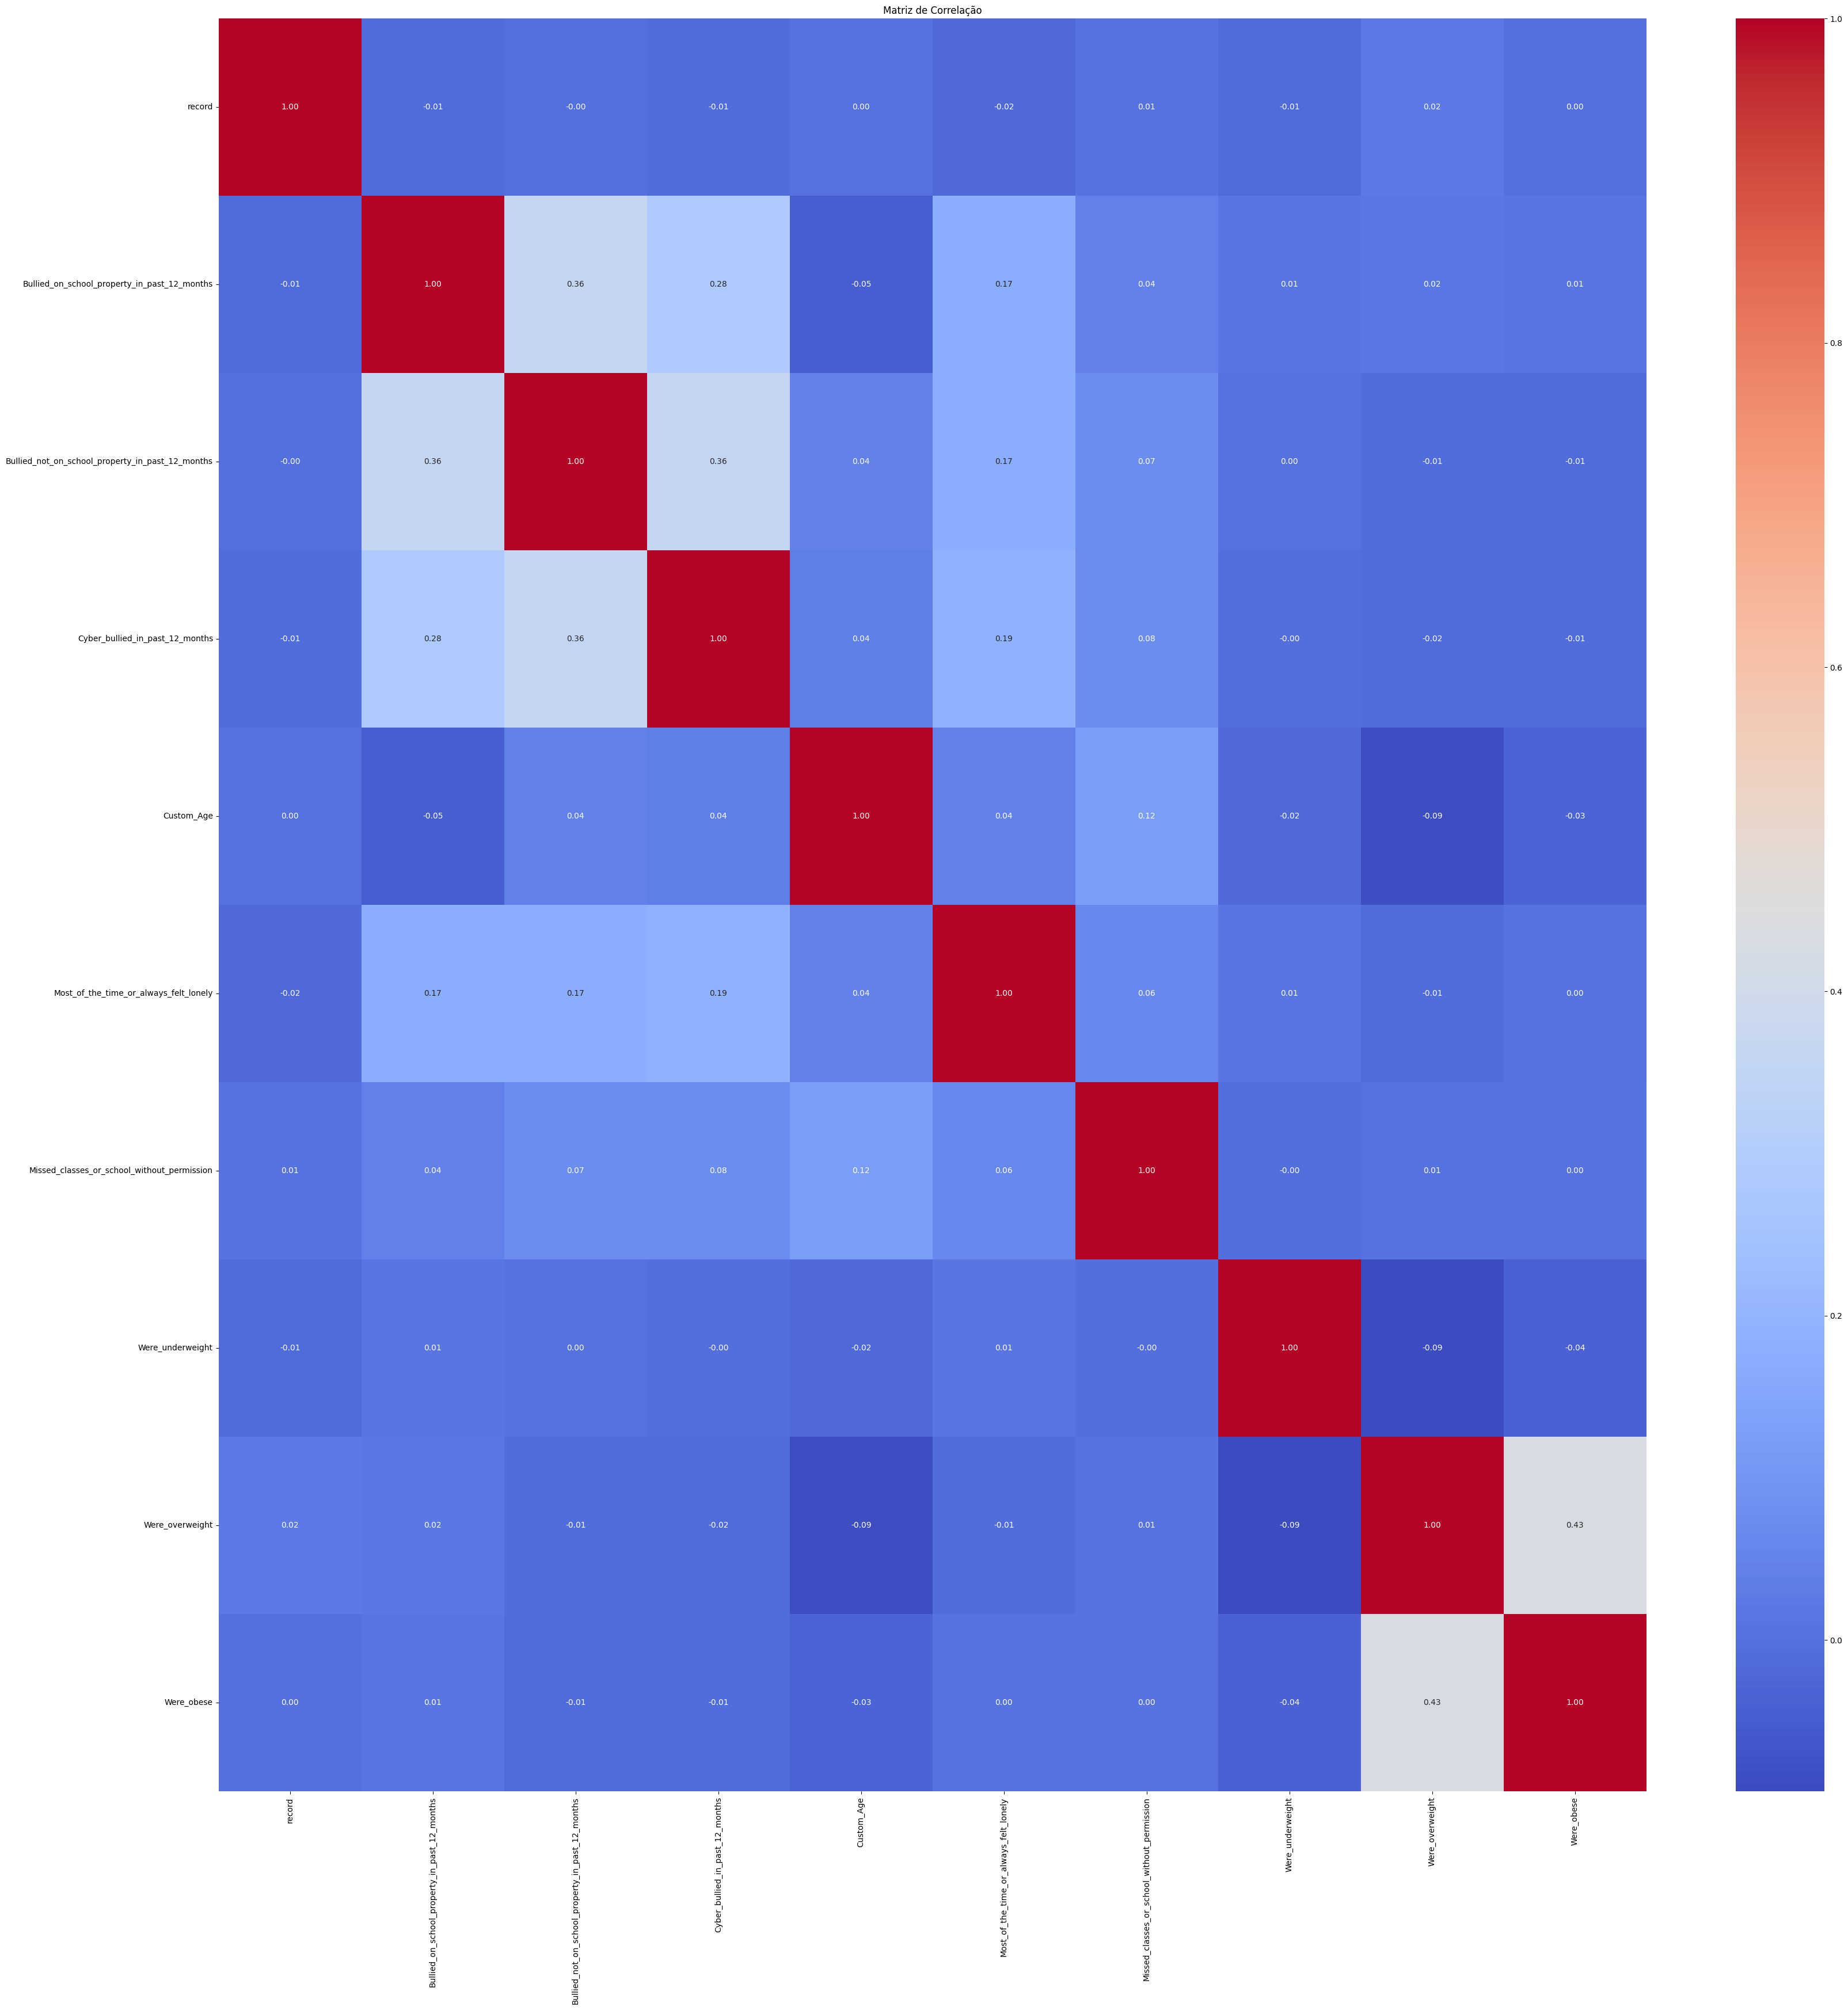

In [ ]:
# Cria o mapa de calor com genero
plt.figure(figsize=(40, 40))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


# Função para calcular o coeficiente de Cramér
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total de amostras
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Armazenar correlações em um dicionário
correlations = {}

for col1 in bullying_Generocat:
    for col2 in bullying_Generocat:
        if col1 != col2 and (col2, col1) not in correlations:
            correlations[(col1, col2)] = cramers_v(bullying_Generocat[col1], bullying_Generocat[col2])

# Exibir as correlações
for pair, value in correlations.items():
    print(f"Correlação entre {pair[0]} e {pair[1]}: {value:.2f}")



Correlação entre Sex e Physically_attacked: 0.05
Correlação entre Sex e Physical_fighting: 0.20
Correlação entre Sex e Felt_lonely: 0.28
Correlação entre Sex e Close_friends: 0.08
Correlação entre Sex e Miss_school_no_permission: 0.04
Correlação entre Sex e Other_students_kind_and_helpful: 0.05
Correlação entre Sex e Parents_understand_problems: 0.04
Correlação entre Physically_attacked e Physical_fighting: 0.16
Correlação entre Physically_attacked e Felt_lonely: 0.10
Correlação entre Physically_attacked e Close_friends: 0.03
Correlação entre Physically_attacked e Miss_school_no_permission: 0.06
Correlação entre Physically_attacked e Other_students_kind_and_helpful: 0.06
Correlação entre Physically_attacked e Parents_understand_problems: 0.06
Correlação entre Physical_fighting e Felt_lonely: 0.04
Correlação entre Physical_fighting e Close_friends: 0.02
Correlação entre Physical_fighting e Miss_school_no_permission: 0.09
Correlação entre Physical_fighting e Other_students_kind_and_helpf

Interpretação de Cramér's V
0.0: Sem associação.
0.1 a 0.3: Associação fraca.
0.3 a 0.6: Associação moderada.
0.6 a 1.0: Associação forte.


# Análise Categórica (Moda, Teste Qui-Quadrado e Visualizações)

###Faça a análise exploratória dos dados categóricos, calcule a moda e as variáveis e utilize recursos visuais, utilize o teste qui-quadrado para avaliar a análise de correspondência.

In [ ]:
# Retornando a frequência e a moda de cada variável
variaveis_categoricas = {
    col: {
        "Moda": bullying_copy[col].mode()[0],
        "Valores Únicos": bullying_copy[col].nunique(),
        "Frequências": bullying_copy[col].value_counts().to_dict(),
    }
    for col in bullying_copy.columns if bullying_copy[col].dtype == 'object'
}
variaveis_categoricas

{'Bullied_on_school_property_in_past_12_months': {'Moda': 'No',
  'Valores Únicos': 2,
  'Frequências': {'No': 43839, 'Yes': 11903}},
 'Bullied_not_on_school_property_in_past_12_months': {'Moda': 'No',
  'Valores Únicos': 2,
  'Frequências': {'No': 44263, 'Yes': 12229}},
 'Cyber_bullied_in_past_12_months': {'Moda': 'No',
  'Valores Únicos': 2,
  'Frequências': {'No': 44213, 'Yes': 12197}},
 'Custom_Age': {'Moda': '14 years old',
  'Valores Únicos': 8,
  'Frequências': {'14 years old': 12946,
   '15 years old': 12812,
   '16 years old': 11738,
   '13 years old': 10574,
   '17 years old': 8227,
   '18 years old or older': 383,
   '12 years old': 145,
   '11 years old or younger': 48}},
 'Sex': {'Moda': 'Female',
  'Valores Únicos': 2,
  'Frequências': {'Female': 29362, 'Male': 27083}},
 'Physically_attacked': {'Moda': '0 times',
  'Valores Únicos': 8,
  'Frequências': {'0 times': 46997,
   '1 time': 5248,
   '2 or 3 times': 2405,
   '12 or more times': 790,
   '4 or 5 times': 695,
   '6 

A partir dessas informações, as variáveis categóricas podem ser divididas:
1. Ordinais


* Custom_Age: Idade personalizada
* Physically_attacked: Atacado fisicamente
* Physical_fighting: Luta física
* Felt_lonely: Sentiu-se solitário
* Close_friends: Amigos próximos
* Miss_school_no_permission: Faltou à escola sem permissão
* Other_students_kind_and_helpful: Outros alunos gentis e prestativos
* Parents_understand_problems: Pais compreenderam problemas


2. Nominais, com respostas 'Yes'/'No' ou 'F'/'M' para gênero.


* Bullied_on_school_property_in_past_12_months: Sofreu bullying na escola nos últimos 12 meses
* Bullied_not_on_school_property_in_past_12_months: Sofreu bullying fora da escola nos últimos 12 meses
* Cyber_bullied_in_past_12_months: Sofreu bullying virtual nos últimos 12 meses
* Sex: Gênero
* Most_of_the_time_or_always_felt_lonely: Sentiu-se sozinho na maioria das vezes ou sempre
* Missed_classes_or_school_without_permission: Faltou na escola sem permissão
* Were_underweight: Esteve abaixo do peso
* Were_overweight: Esteve acima do peso
* Were_obese: Esteve obeso

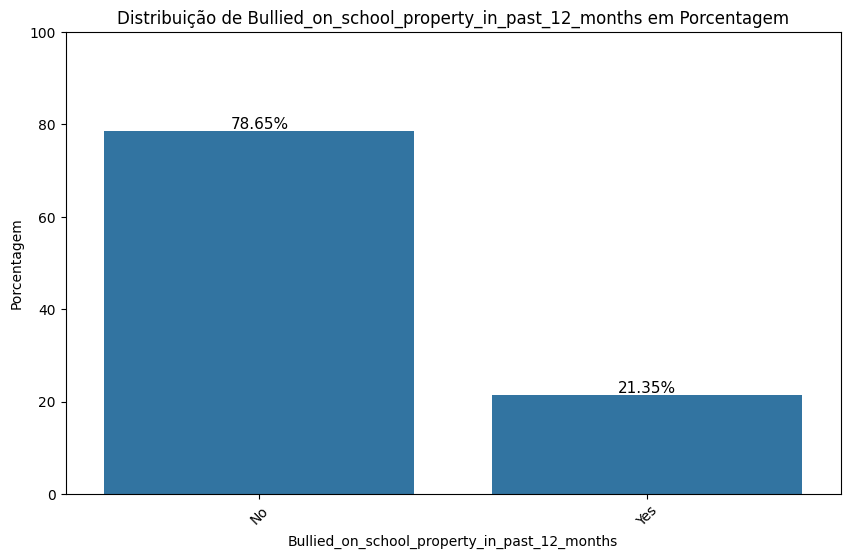

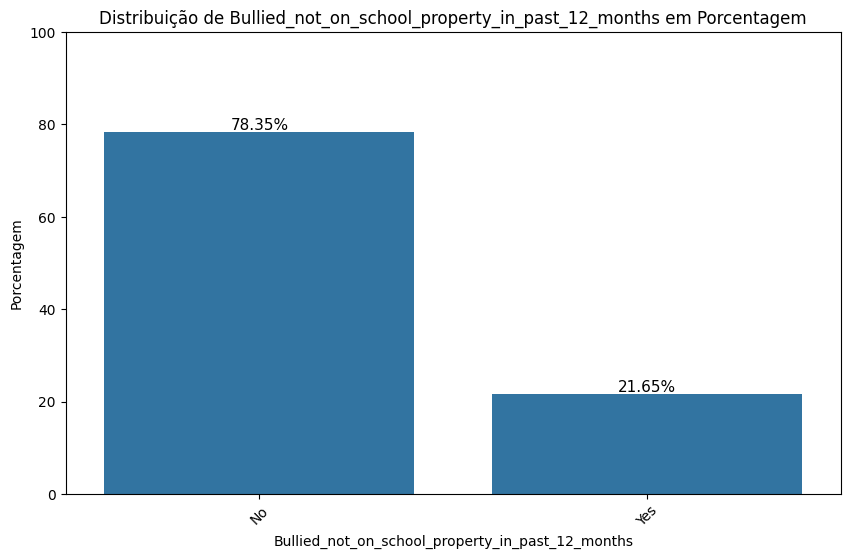

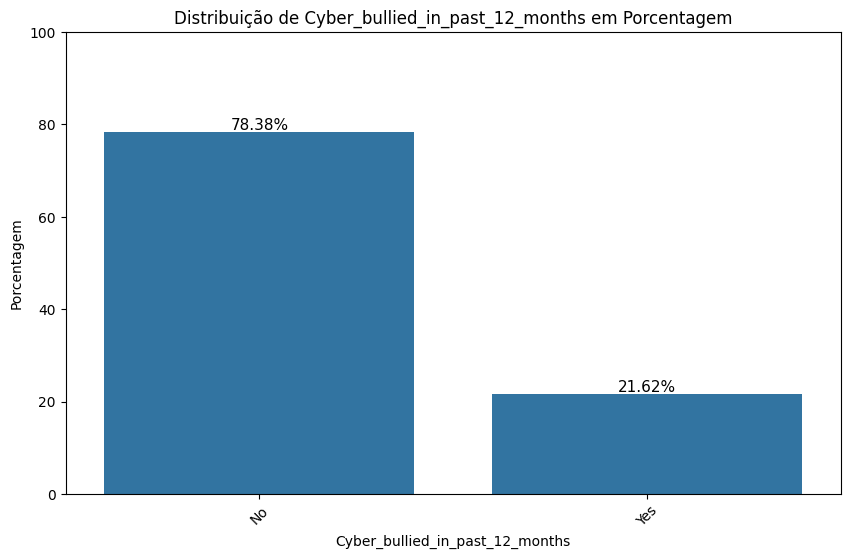

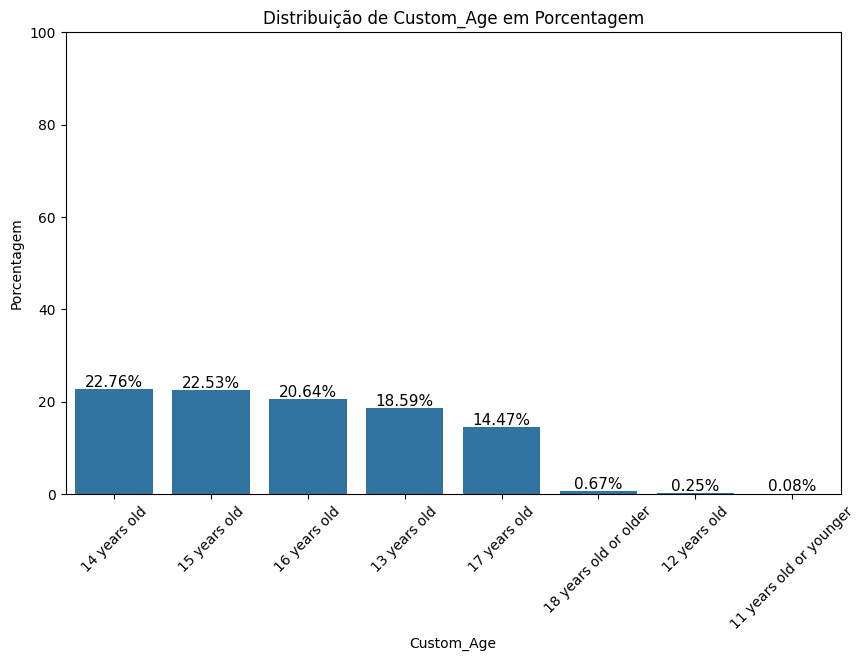

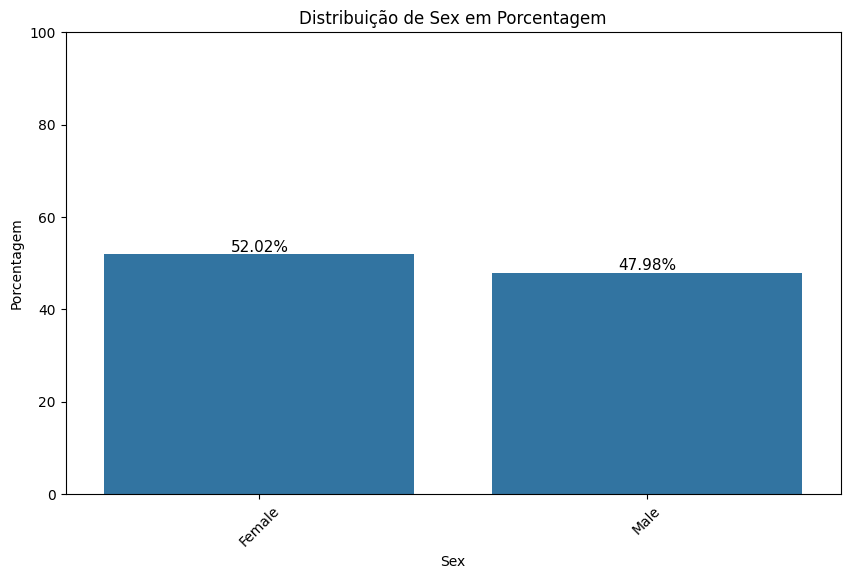

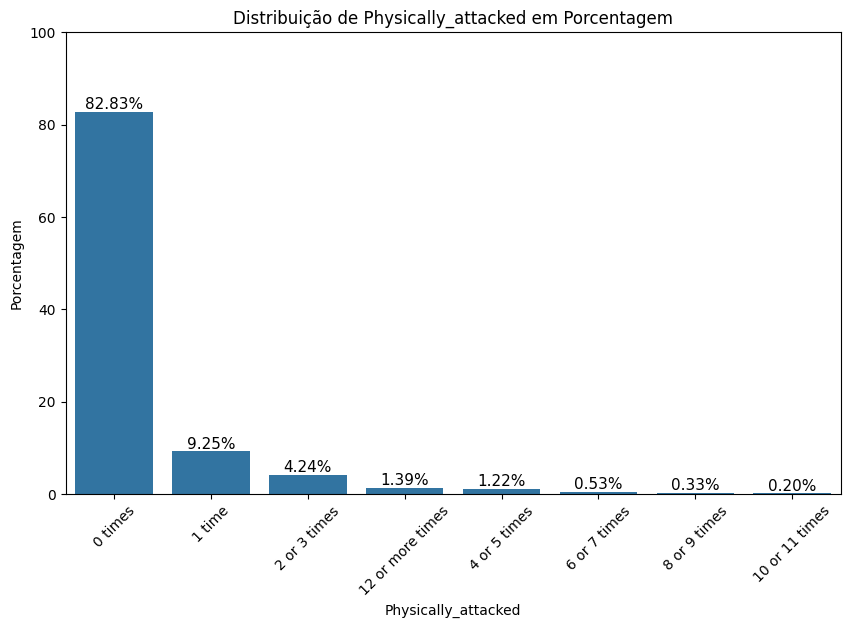

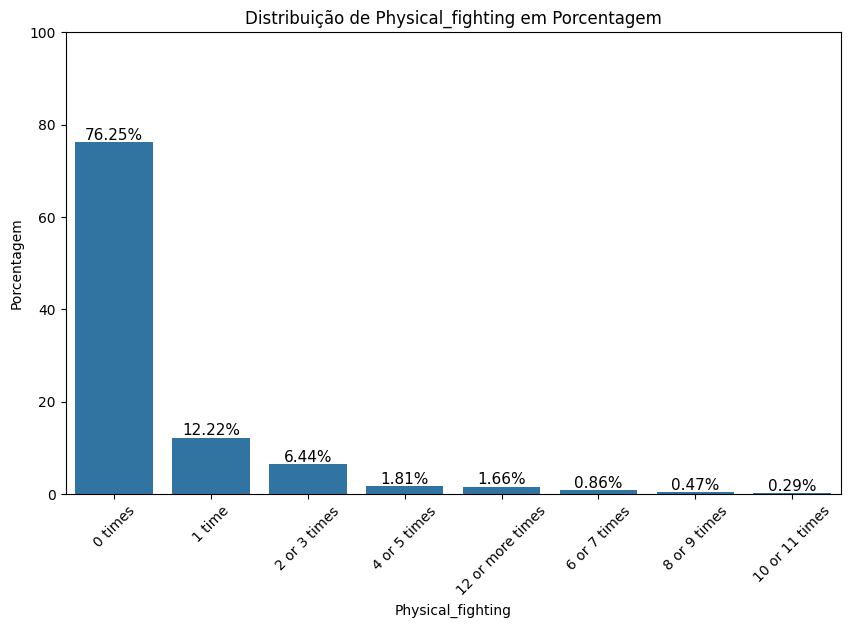

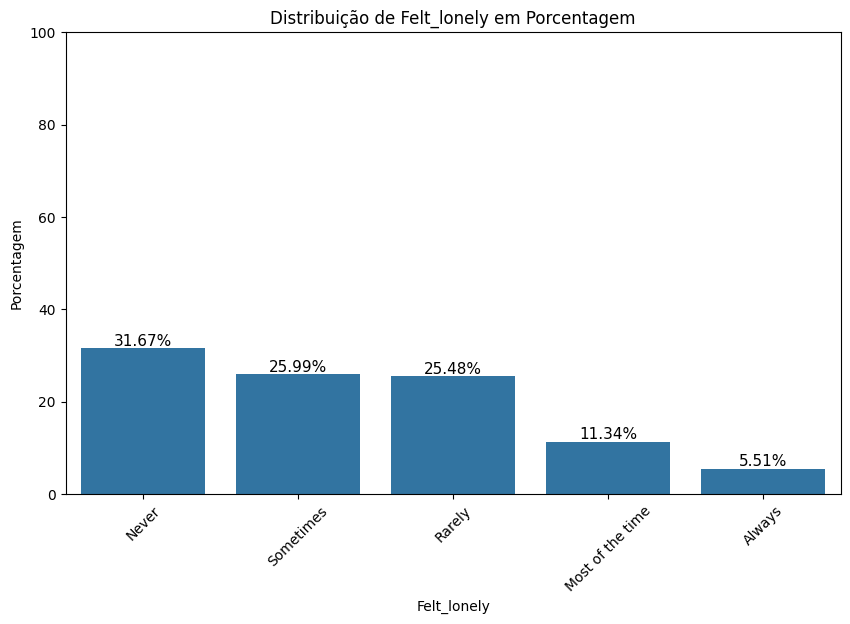

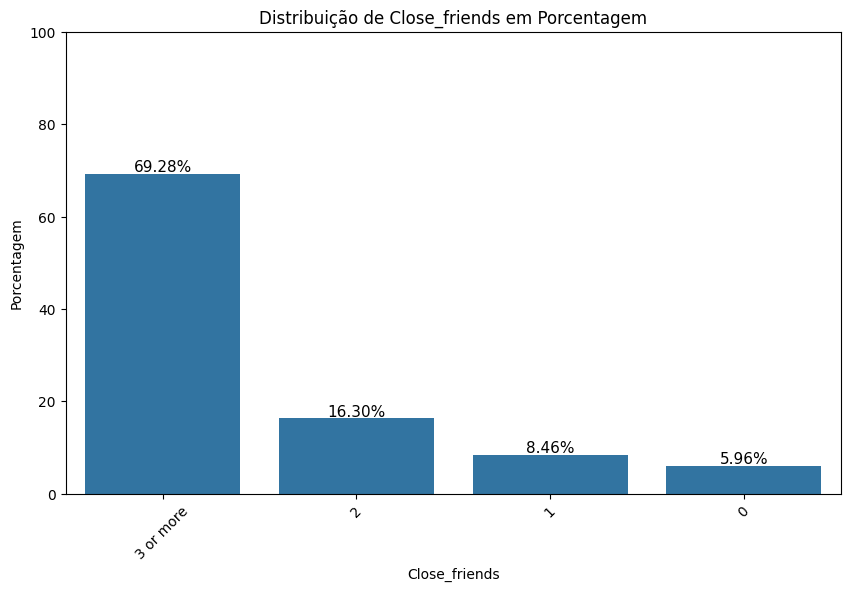

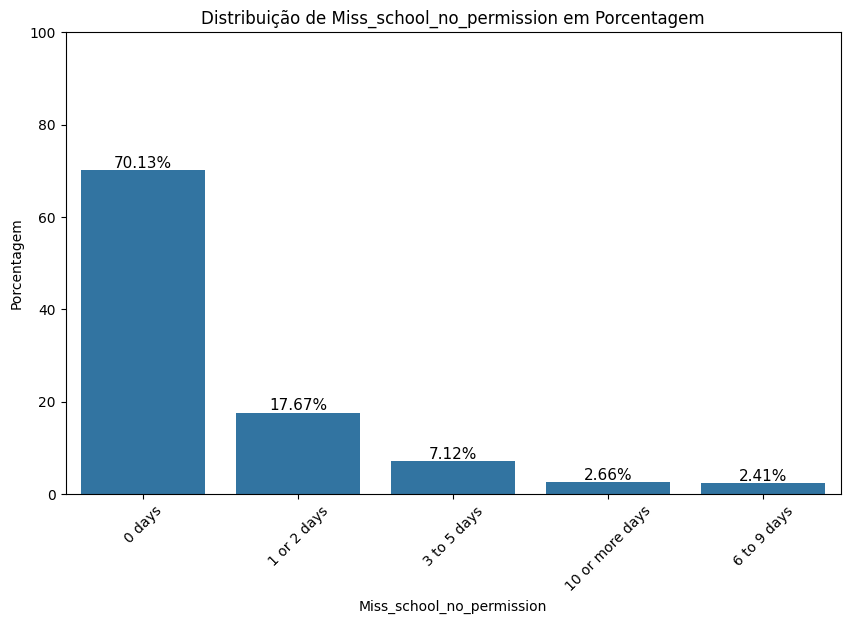

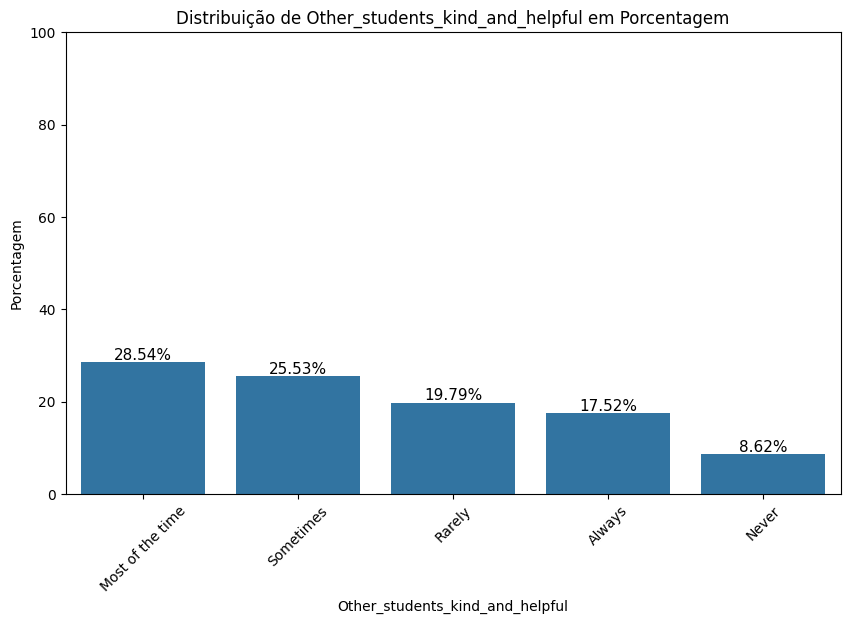

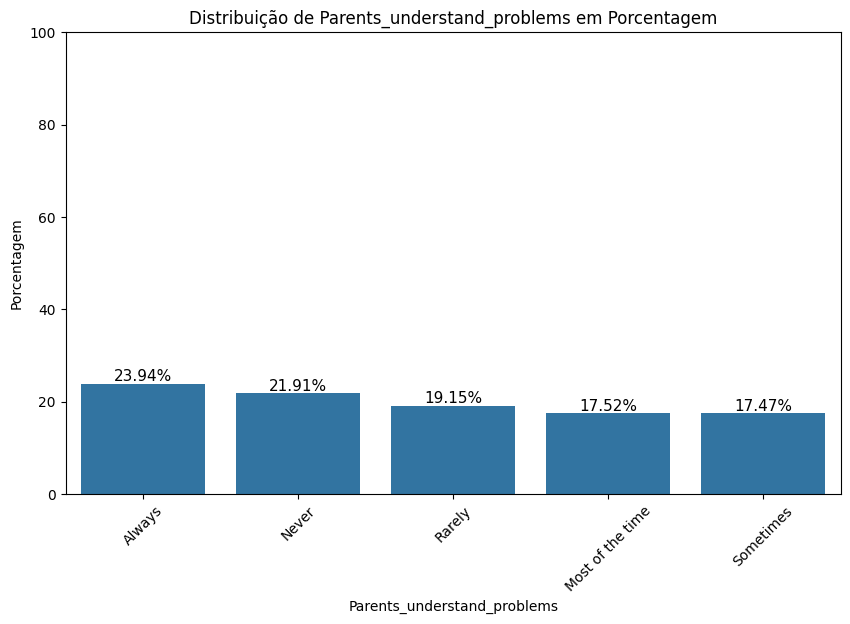

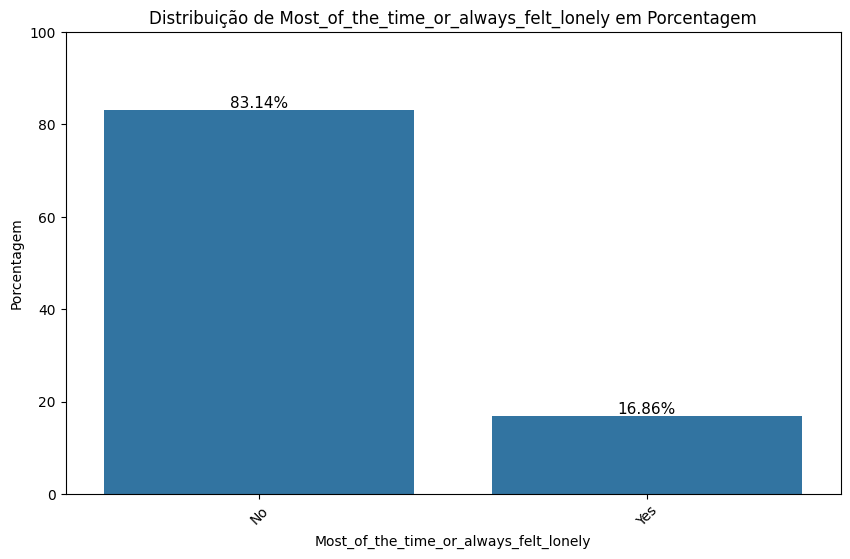

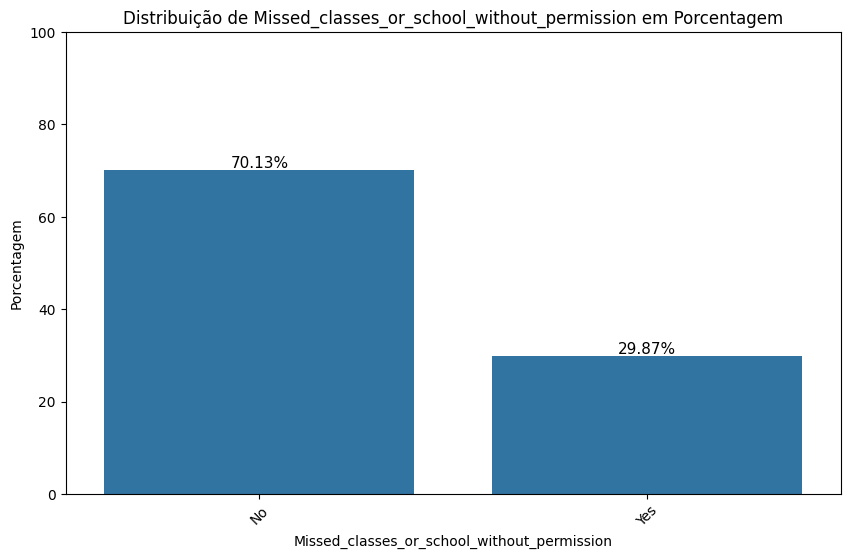

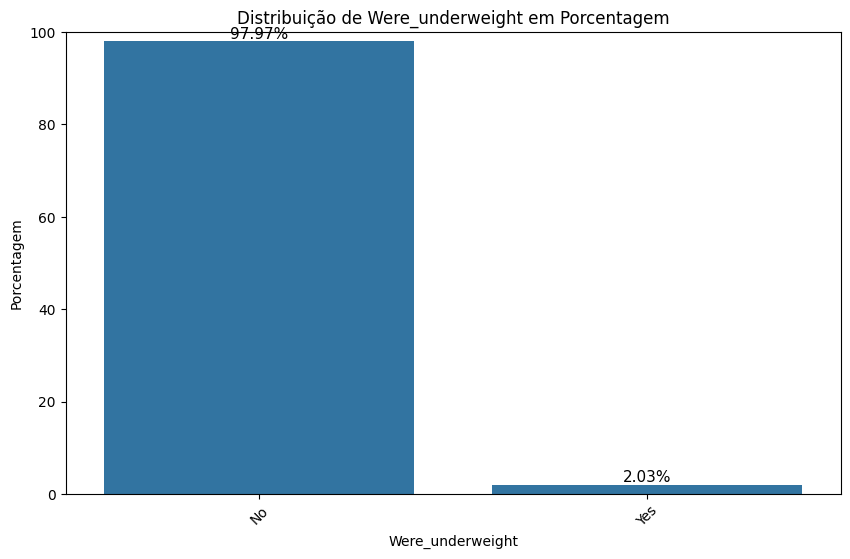

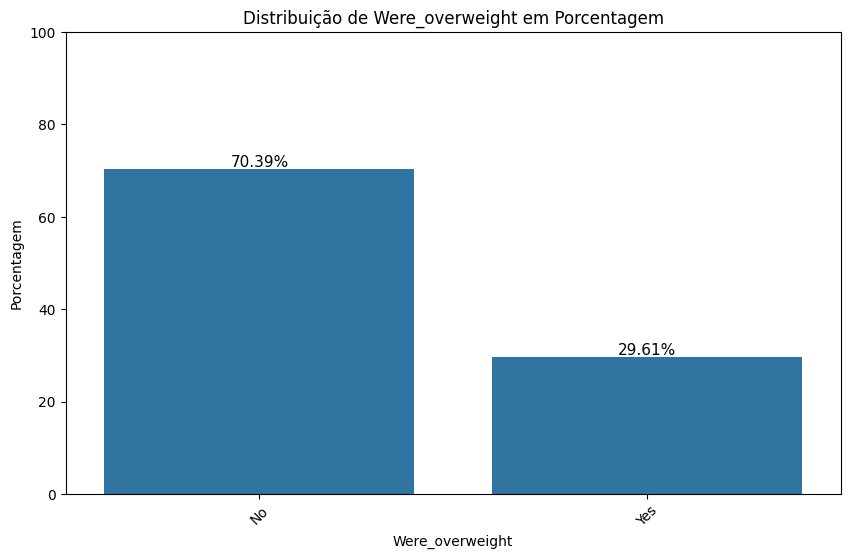

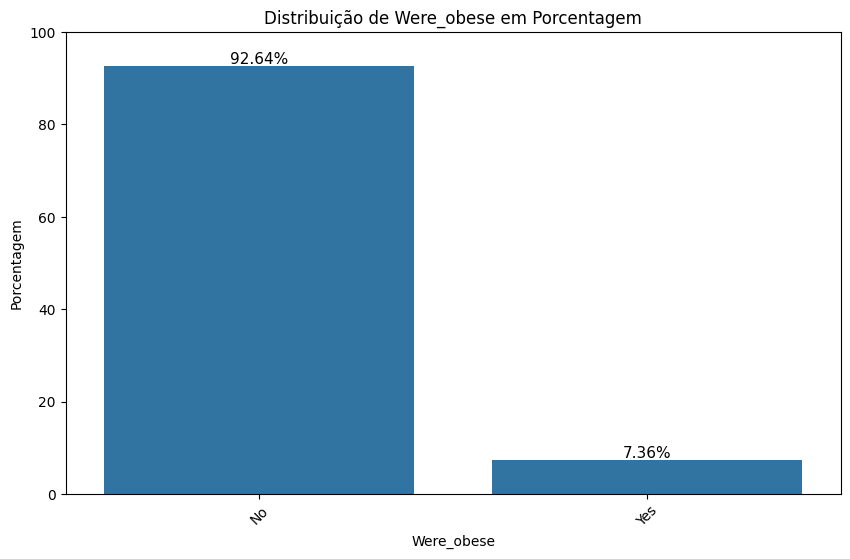

In [ ]:
# Plotando gráficos de barra (com porcentagem) para as variáveis categóricas

for col in bullying_copy.columns:
    if bullying_copy[col].dtype == 'object':
        # Contando a frequência de cada categoria e calculando a porcentagem
        value_counts = bullying_copy[col].value_counts()
        percentages = value_counts / value_counts.sum() * 100

        # Criando o gráfico
        plt.figure(figsize=(10, 6))
        sns.barplot(x=percentages.index, y=percentages.values)
        plt.title(f'Distribuição de {col} em Porcentagem')
        plt.ylabel('Porcentagem')
        plt.xticks(rotation=45)

        # Definindo o limite do eixo y para 100%
        plt.ylim(0, 100)

        # Adicionando os valores nas barras
        for p in plt.gca().patches:
            plt.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')

        plt.show()

A amostra é composta principalmente de adolescentes na faixa de 14 a 16 anos (**65,93%**). Sendo a maioria do sexo Feminino (**52.02%**).

* Tratando-se de Bullying na escola ou fora dela, pouco mais de **78%** dos alunos afirmam não ter sofrido desse problema.
O mesmo para cyberbullying.

* Sobre os ataques físicos, **82,83%** dos alunos nunca sofreram com isso nem entraram em luta física (**76,25%**).

* **31.67%** dos alunos nunca se sentiram sozinhos, porém **16,85%** já se sentiram sozinhos sempre ou na maioria das vezes.
Muitos deles possuem mais do que 3 amigos próximos (**69.28%**), mas **5.96%** deles não tem amigos.
Além disso, apesar dos alunos considerarem que outros alunos são gentis e prestativos (**28.54%**), alguns não tem essa mesma opnião (**8.62%**)

* A compreensão dos pais sobre os problemas dos filhos mostra-se semelhante. Enquanto **23.94%** sempre compreendem, **21.91%** nunca perceberam os problemas dos filhos.

* Cerca de **70%** dos alunos não faltaram escola sem permissão.

* Sobre ao peso dos alunos, muitos deles nem estão acima nem abaixo do peso ou até mesmo obeso.



---

Como apresentado anteriormente, para verificar a correlação entre as variáveis categóricas, foi utilizado o coeficiente de Cramér.

O mesmo é derivado do teste Qui-quadrado, mas é uma medida mais interpretável, variando de 0 a 1. Um valor de 0 indica independência entre as variáveis, enquanto um valor de 1 indica associação perfeita.


Sendo assim, todas as **associações são fracas (0.1 a 0.3)**.


# Visualizações Gráficas (Histogramas e Boxplots por Gênero e Idade)

#Teste com categorico sem nulo


In [ ]:
categorical_df = bullying_copy
# Substituir valores nulos por "Não informado"
categorical_df = categorical_df.fillna("Não informado")

# Exibir o dataframe categórico
print(categorical_df)


       record Bullied_on_school_property_in_past_12_months  \
0           1                                          Yes   
1           2                                           No   
2           3                                           No   
3           4                                           No   
4           5                                           No   
...       ...                                          ...   
56976   57091                                           No   
56977   57092                                           No   
56978   57093                                           No   
56979   57094                                           No   
56980   57095                                           No   

      Bullied_not_on_school_property_in_past_12_months  \
0                                                  Yes   
1                                                   No   
2                                                   No   
3                      

###Plote histogramas e boxplots para cada tipo de bullying separado por gênero e idade.

# 1- PLOTANDO HISTOGRAMAS

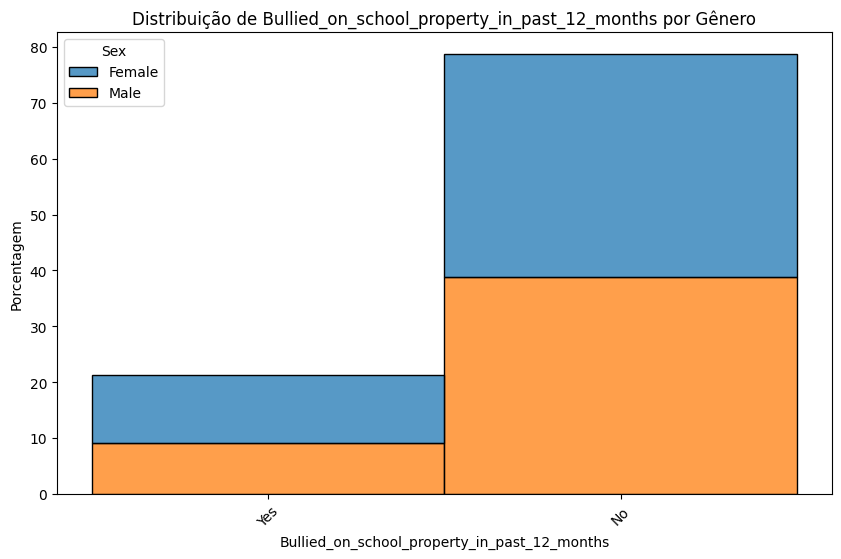

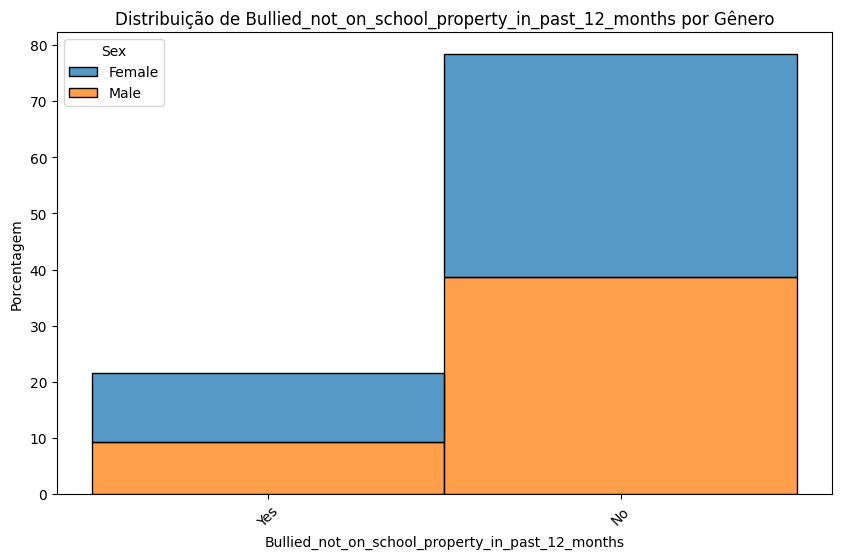

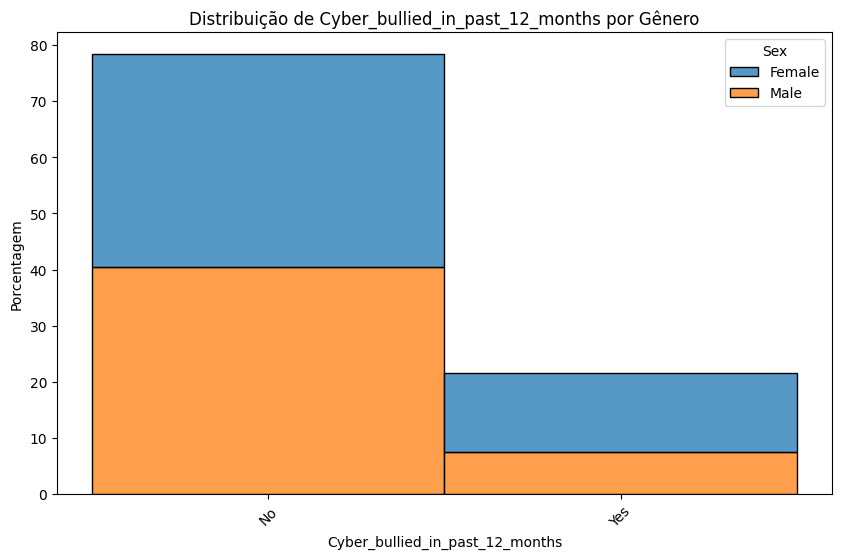

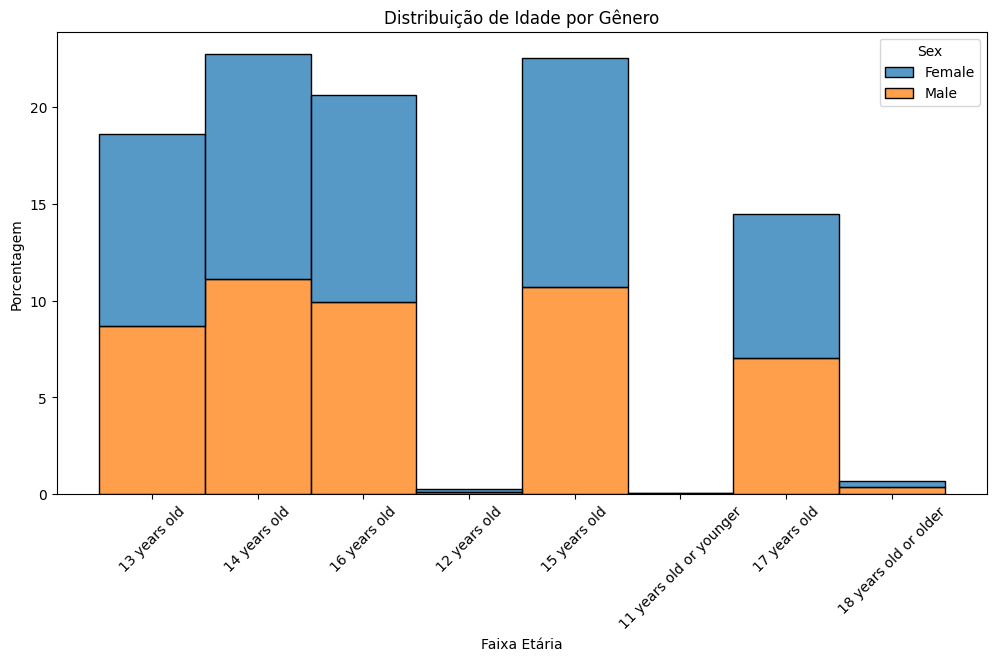

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para cada variável de bullying
for col in ['Bullied_on_school_property_in_past_12_months',
            'Bullied_not_on_school_property_in_past_12_months',
            'Cyber_bullied_in_past_12_months']:

    plt.figure(figsize=(10, 6))
    sns.histplot(data=bullying_copy, x=col, hue="Sex", multiple="stack", kde=False, stat="percent")
    plt.title(f'Distribuição de {col} por Gênero')
    plt.ylabel('Porcentagem')
    plt.xlabel(col)

    # Ajustando a rotação das legendas do eixo X para evitar sobreposição
    plt.xticks(rotation=45)

    plt.show()

# Para as idades, podemos criar histogramas similares com as faixas etárias
plt.figure(figsize=(12, 6))
sns.histplot(data=bullying_copy, x="Custom_Age", hue="Sex", multiple="stack", kde=False, stat="percent")
plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Porcentagem')

# Ajustando a rotação das legendas do eixo X para evitar sobreposição
plt.xticks(rotation=45)

plt.show()




# 1- PLOTANDO HISTOGRAMAS SEM Nulos

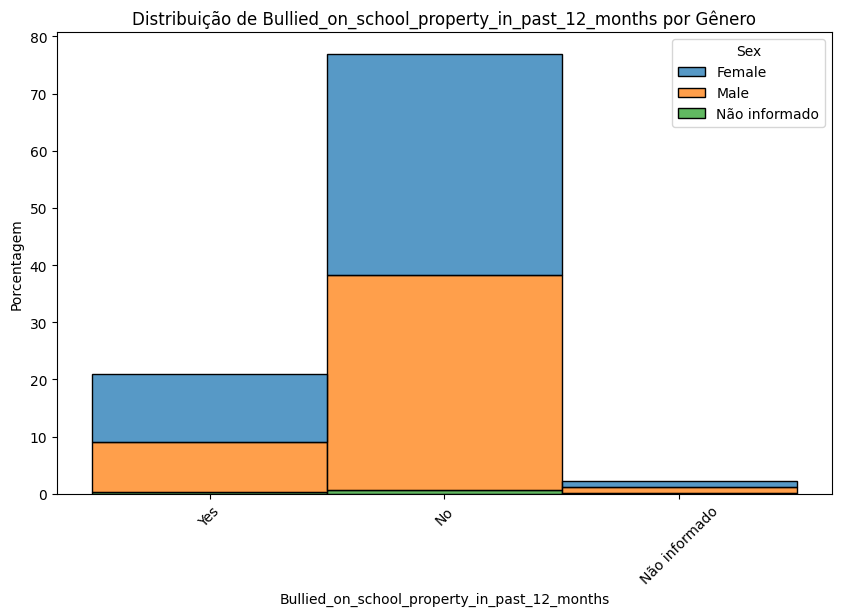

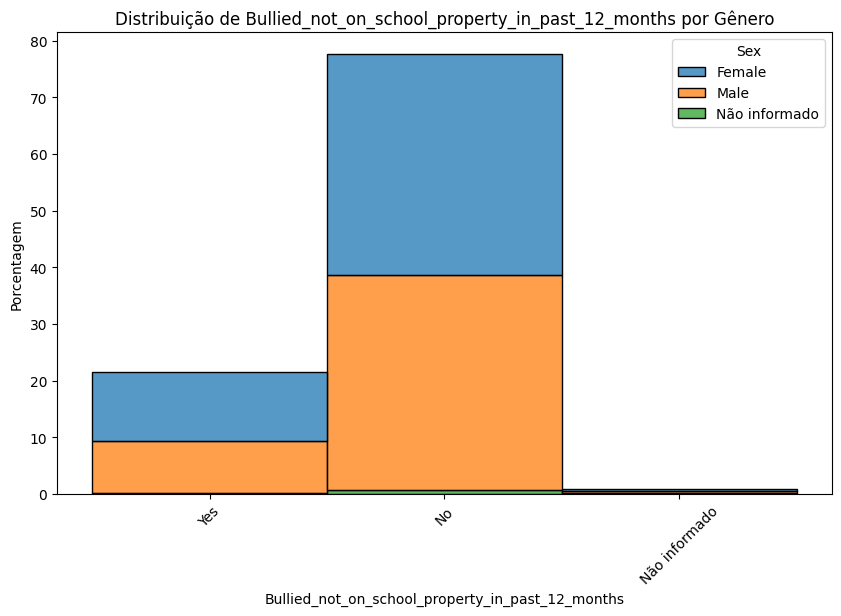

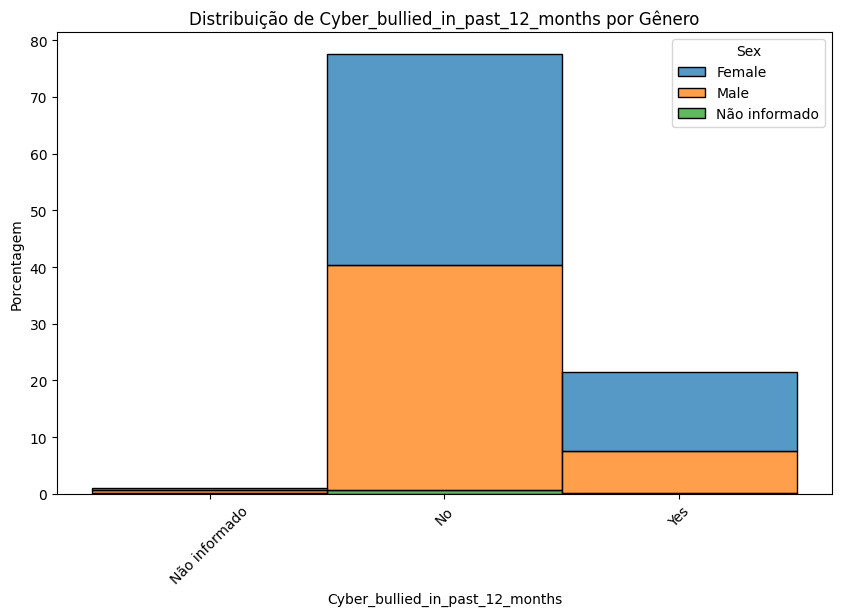

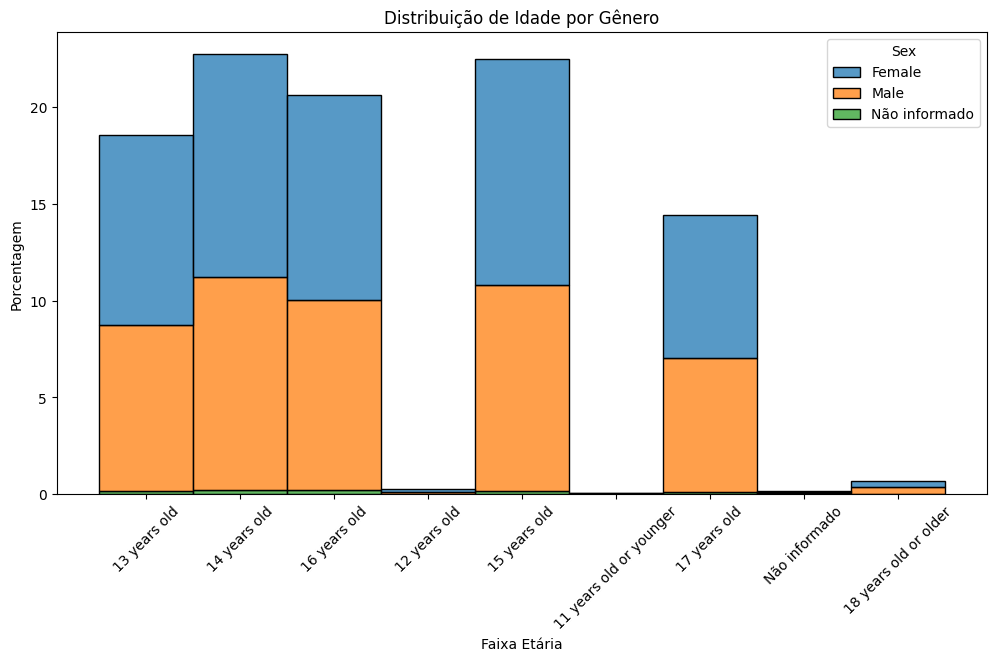

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para cada variável de bullying
for col in ['Bullied_on_school_property_in_past_12_months',
            'Bullied_not_on_school_property_in_past_12_months',
            'Cyber_bullied_in_past_12_months']:

    plt.figure(figsize=(10, 6))
    sns.histplot(data=categorical_df, x=col, hue="Sex", multiple="stack", kde=False, stat="percent")
    plt.title(f'Distribuição de {col} por Gênero')
    plt.ylabel('Porcentagem')
    plt.xlabel(col)

    # Ajustando a rotação das legendas do eixo X para evitar sobreposição
    plt.xticks(rotation=45)

    plt.show()

# Para as idades, podemos criar histogramas similares com as faixas etárias
plt.figure(figsize=(12, 6))
sns.histplot(data=categorical_df, x="Custom_Age", hue="Sex", multiple="stack", kde=False, stat="percent")
plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Porcentagem')

# Ajustando a rotação das legendas do eixo X para evitar sobreposição
plt.xticks(rotation=45)

plt.show()




# 2- PLOTANDO BOXPLOTS

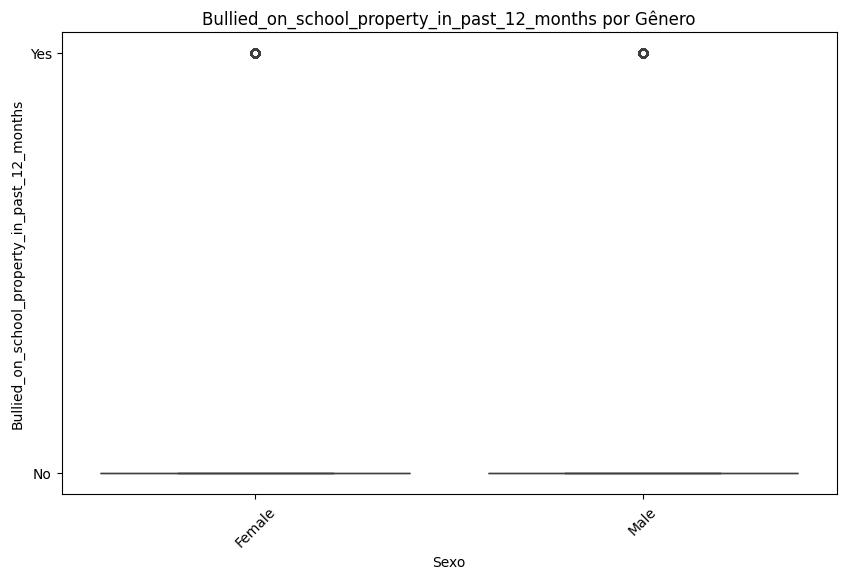

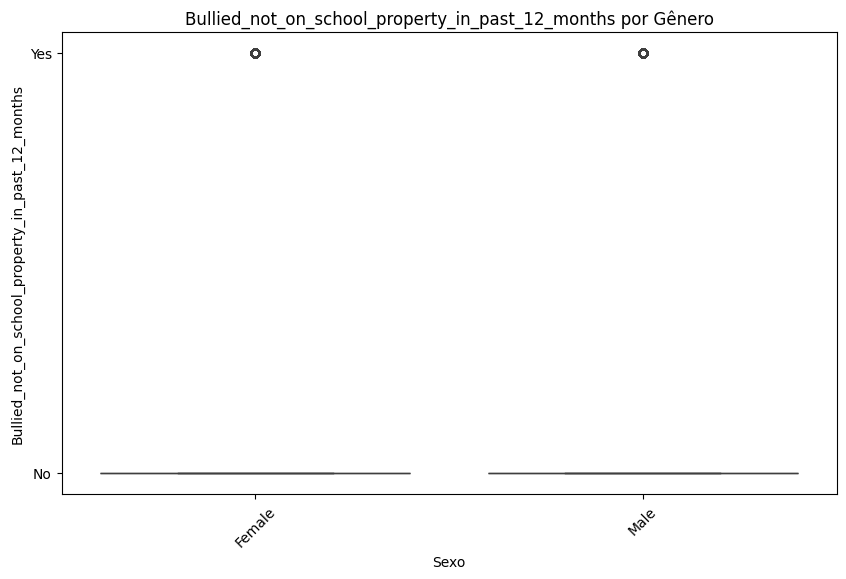

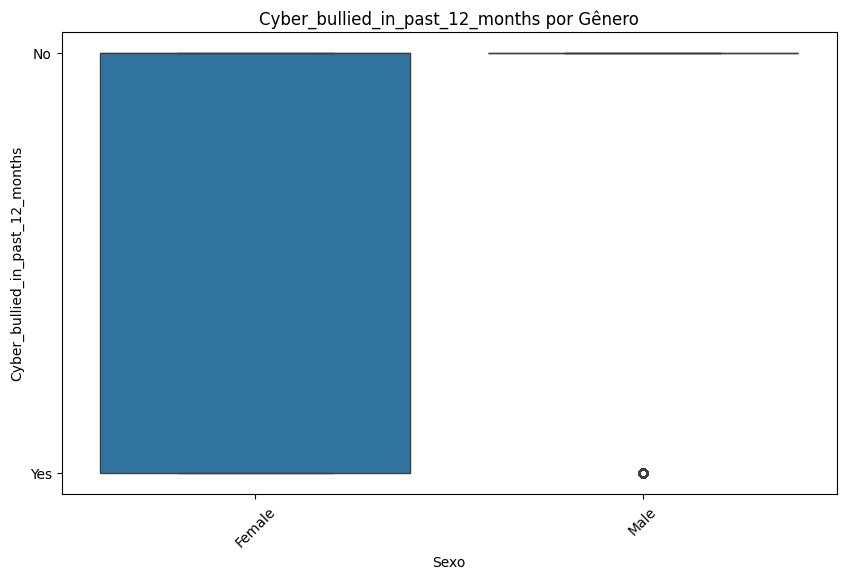

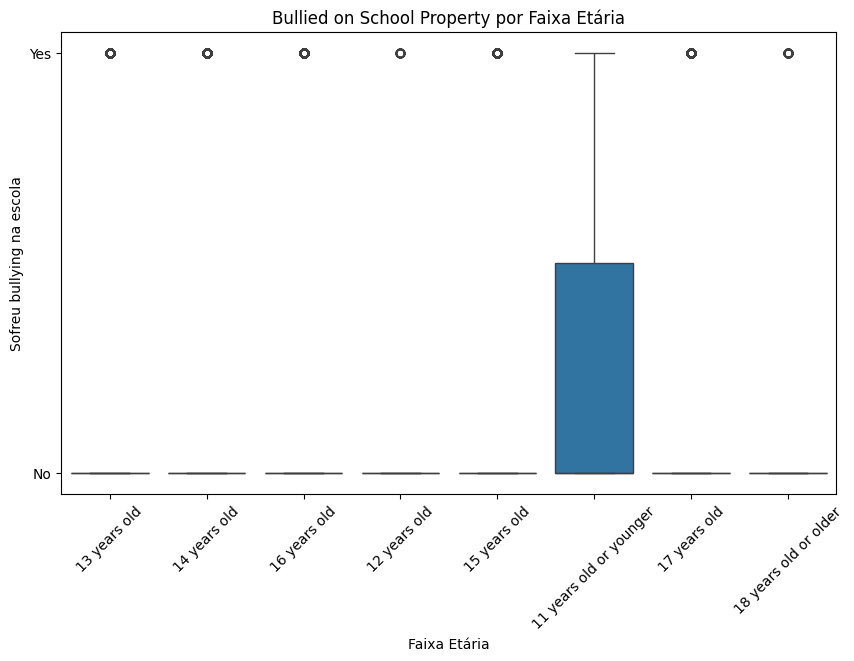

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para tipos de bullying com relação ao sexo
for col in ['Bullied_on_school_property_in_past_12_months',
            'Bullied_not_on_school_property_in_past_12_months',
            'Cyber_bullied_in_past_12_months']:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Sex", y=col, data=bullying_copy)
    plt.title(f'{col} por Gênero')
    plt.ylabel(col)
    plt.xlabel('Sexo')

    # Ajustando a rotação das legendas do eixo X para evitar sobreposição
    plt.xticks(rotation=45)

    # Exibindo o gráfico
    plt.show()

# Boxplot para tipos de bullying com relação à idade
plt.figure(figsize=(10, 6))
sns.boxplot(x="Custom_Age", y="Bullied_on_school_property_in_past_12_months", data=bullying_copy)
plt.title('Bullied on School Property por Faixa Etária')
plt.ylabel('Sofreu bullying na escola')
plt.xlabel('Faixa Etária')

# Ajustando a rotação das legendas do eixo X para evitar sobreposição
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()


# 2- PLOTANDO BOXPLOTS Sem Nulos

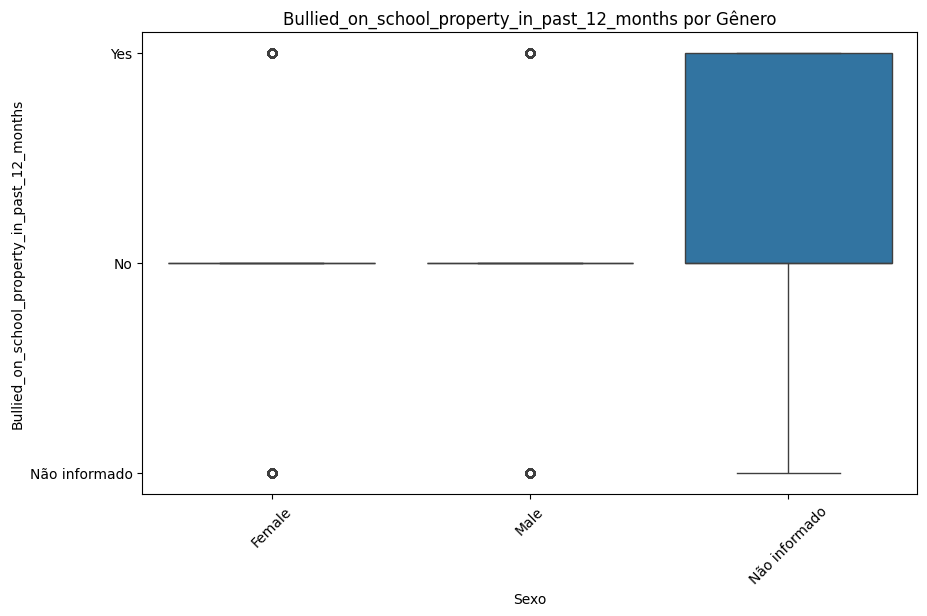

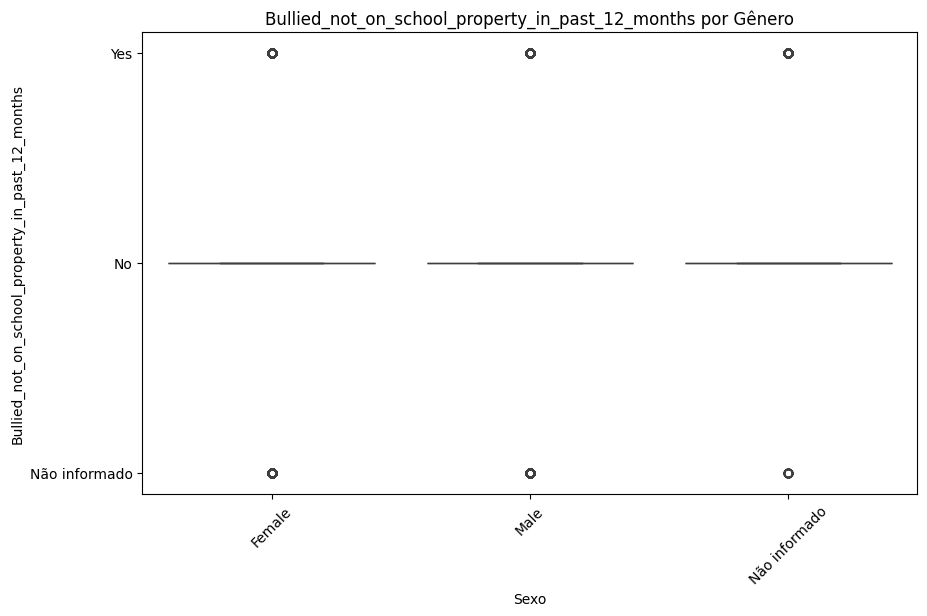

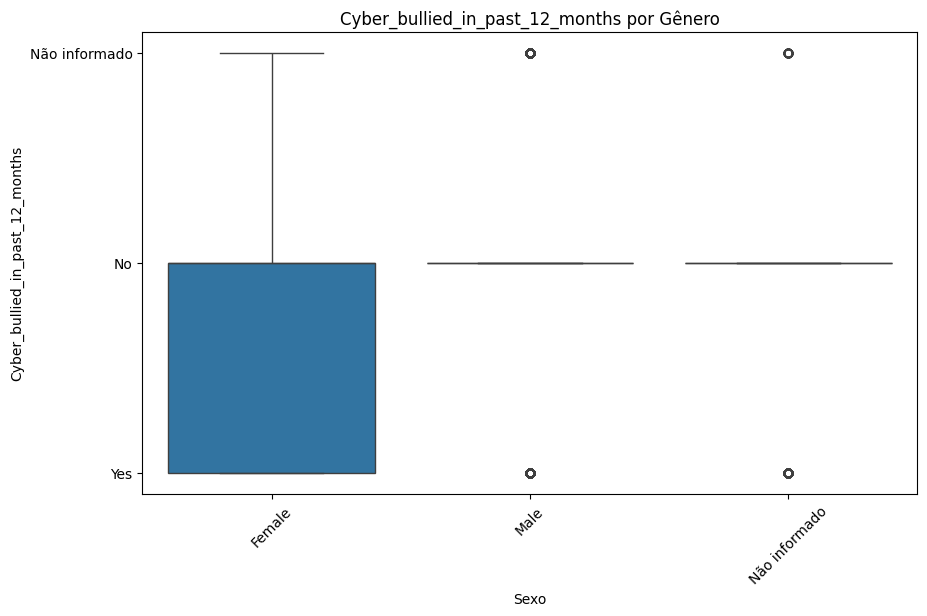

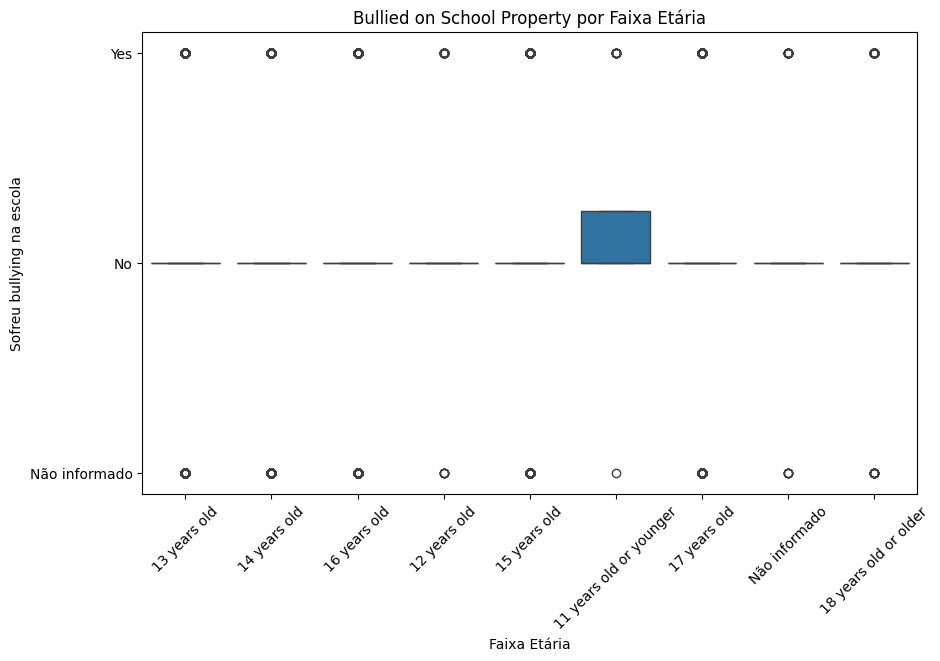

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para tipos de bullying com relação ao sexo
for col in ['Bullied_on_school_property_in_past_12_months',
            'Bullied_not_on_school_property_in_past_12_months',
            'Cyber_bullied_in_past_12_months']:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Sex", y=col, data=categorical_df)
    plt.title(f'{col} por Gênero')
    plt.ylabel(col)
    plt.xlabel('Sexo')

    # Ajustando a rotação das legendas do eixo X para evitar sobreposição
    plt.xticks(rotation=45)

    # Exibindo o gráfico
    plt.show()

# Boxplot para tipos de bullying com relação à idade
plt.figure(figsize=(10, 6))
sns.boxplot(x="Custom_Age", y="Bullied_on_school_property_in_past_12_months", data=categorical_df)
plt.title('Bullied on School Property por Faixa Etária')
plt.ylabel('Sofreu bullying na escola')
plt.xlabel('Faixa Etária')

# Ajustando a rotação das legendas do eixo X para evitar sobreposição
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

# Interpretação Geral dos Dados nos Graficos


**1- Dados Majoritariamente Negativos:** A maioria dos participantes não sofreu bullying na escola, fora da escola ou virtualmente nos últimos 12 meses.

**2- Homogeneidade entre Gêneros:** Os gráficos sugerem que as diferenças entre os gêneros são mínimas, pelo menos na frequência com que esses eventos foram reportados.

**3- Outliers:** Alguns poucos casos isolados de bullying são reportados, mas sua incidência é baixa.

**4-Faixa Etária:**
Crianças de 11 anos ou menos são as que mais relatam ter sofrido bullying na escola, com uma maior variabilidade nos dados.

À medida que a idade aumenta (13 anos ou mais), a incidência de bullying relatado diminui drasticamente, com valores mais uniformes próximos de "No".

# Construção do Modelo de Regressão Logística

###Construa um modelo de regressão logística para prever a probabilidade de um indivíduo sofrer bullying na escola, considere como target: Bullied_on_school_property_in_past_12_months que representa 1 caso o indivíduo tenha sofrido bullying na escola nos últimos 12 meses, 0 caso contrário.

In [ ]:
#bullying_2 = bullying_2.drop(columns=['record'])

binary_cols = [col for col in bullying_2.select_dtypes(include=['float']).columns]

# Verificar as colunas binárias identificadas
print("Colunas binárias:", binary_cols)

# Converter as colunas binárias para 'int' (se não forem inteiros ainda)
bullying_2[binary_cols] = bullying_2[binary_cols].astype(int)
bullying_2.head()

Colunas binárias: ['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months', 'Sex', 'Most_of_the_time_or_always_felt_lonely', 'Missed_classes_or_school_without_permission', 'Were_underweight', 'Were_overweight', 'Were_obese']


,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,1,0,13.0,0,0 times,0 times,Always,2,10 or more days,Never,Always,1,1,0,0,0
1,0,0,0,13.0,0,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,0,0,0,0,0
2,0,0,0,14.0,1,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,0,0,0,0,0
3,0,0,0,16.0,1,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,Não informado,0,0,0,0,0
4,0,0,0,13.0,0,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir a variável alvo (target)
target = 'Bullied_on_school_property_in_past_12_months'

# Identificar colunas binárias (com valores 0 e 1)
binary_cols = bullying_2.columns[bullying_2.nunique() == 2]

# Preencher valores nulos nas colunas binárias com a moda
for col in binary_cols:
    moda = bullying_2[col].mode()[0]
    bullying_2[col] = bullying_2[col].fillna(moda)

# Identificar colunas não binárias (diferentes de 0 e 1)
non_binary_cols = bullying_2.columns.difference(binary_cols)

# Preencher valores nulos nas colunas não binárias com "Não informado"
for col in non_binary_cols:
    bullying_2[col] = bullying_2[col].fillna("Não informado")

# Garantir que a variável alvo (target) seja excluída do pré-processamento de One-Hot Encoding
categorical_cols = bullying_2.select_dtypes(include=['object']).columns

# Excluindo a coluna alvo do OneHotEncoder
categorical_cols = categorical_cols[categorical_cols != target]

# Garantir que as colunas categóricas sejam do tipo 'str'
for col in categorical_cols:
    bullying_2[col] = bullying_2[col].astype(str)

# Definir as variáveis independentes (features)
X = bullying_2.drop(columns=[target])
y = bullying_2[target]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar OneHotEncoding nas variáveis categóricas, excluindo o target
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Deixa as variáveis numéricas sem alteração
)

# Criar o modelo de Regressão Logística dentro de um Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))])

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7431997660134543
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83     13491
           1       0.43      0.64      0.51      3604

    accuracy                           0.74     17095
   macro avg       0.66      0.71      0.67     17095
weighted avg       0.79      0.74      0.76     17095



In [ ]:
bullyingTrain = bullying_2
bullyingTrain = bullyingTrain.drop(columns=['Were_underweight',	'Were_overweight'])
bullyingTrain.head()

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_obese
0,1.0,1.0,0.0,13.0,0.0,0 times,0 times,Always,2,10 or more days,Never,Always,1.0,1.0,0.0
1,0.0,0.0,0.0,13.0,0.0,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,0.0,0.0,0.0
2,0.0,0.0,0.0,14.0,1.0,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,0.0,0.0,0.0
3,0.0,0.0,0.0,16.0,1.0,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,Não informado,0.0,0.0,0.0
4,0.0,0.0,0.0,13.0,0.0,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,0.0,0.0,0.0


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identificar colunas binárias (com valores 0 e 1)
binary_cols = bullyingTrain.columns[bullyingTrain.nunique() == 2]

# Preencher valores nulos nas colunas binárias com a moda
for col in binary_cols:
    moda = bullyingTrain[col].mode()[0]
    bullyingTrain[col] = bullyingTrain[col].fillna(moda)

# Identificar colunas não binárias (diferentes de 0 e 1)
non_binary_cols = bullyingTrain.columns.difference(binary_cols)

# Preencher valores nulos nas colunas não binárias com "Não informado"
for col in non_binary_cols:
    bullyingTrain[col] = bullyingTrain[col].fillna("Não informado")

# Garantir que a variável alvo (target) seja excluída do pré-processamento de One-Hot Encoding
categorical_cols = bullyingTrain.select_dtypes(include=['object']).columns
for col in categorical_cols:
    bullyingTrain[col] = bullyingTrain[col].astype(str)

# Excluindo a coluna alvo do OneHotEncoder
categorical_cols = categorical_cols[categorical_cols != target]

# Definir a variável alvo (target) e as variáveis independentes (features)
target = 'Bullied_on_school_property_in_past_12_months'
X = bullyingTrain.drop(columns=[target])
y = bullyingTrain[target]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar OneHotEncoding nas variáveis categóricas, excluindo o target
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'  # Deixa as variáveis numéricas sem alteração
)

# Criar o modelo de Regressão Logística dentro de um Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))])

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)


**Tratamento de valores nulos:**

As colunas binárias (com valores 0 e 1) tiveram seus valores nulos preenchidos com a moda da respectiva coluna. Isso foi feito porque, em colunas binárias, a moda (valor mais frequente) tende a ser mais representativa.
As colunas não binárias (com valores categóricos) tiveram seus valores nulos preenchidos com a string "Não informado", indicando que a informação estava ausente.

**Seleção das variáveis independentes (features) e alvo (target):**

A variável alvo foi identificada como 'Bullied_on_school_property_in_past_12_months' e foi separada das variáveis independentes.
Variáveis categóricas foram identificadas e excluídas da variável alvo para serem processadas pelo OneHotEncoder, transformando essas variáveis em representações binárias (dummy variables). Isso é essencial para garantir que os modelos de aprendizado de máquina possam trabalhar com variáveis categóricas.


**Ajustes no modelo:**

O modelo de Regressão Logística foi escolhido, com o parâmetro class_weight='balanced' para lidar com o desbalanceamento de classes.
O modelo foi colocado em um Pipeline, onde o pré-processamento das variáveis categóricas (OneHotEncoder) foi feito antes de treinar o modelo.

**Análise de correlação e ajuste de variáveis:**

Ao examinar as correlações entre algumas colunas, foi observado que "Acima do peso" e "Abaixo do peso" que sua correlação com a variável alvo estava muito baixa (próxima de 0).
Ao remover essas colunas, a acurácia aumentou ligeiramente de 64% para 65%.
Avaliação do modelo:




# Avaliação do Modelo e Métricas de Desempenho

###Análise as variáveis mais relevantes no modelo.
###Avalie a performance do modelo usando métricas como Acurácia, Precisão, Recall e plote a matriz de confusão


In [ ]:
# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7435507458321147
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.89      0.77      0.83     13491
         1.0       0.43      0.64      0.51      3604

    accuracy                           0.74     17095
   macro avg       0.66      0.71      0.67     17095
weighted avg       0.79      0.74      0.76     17095



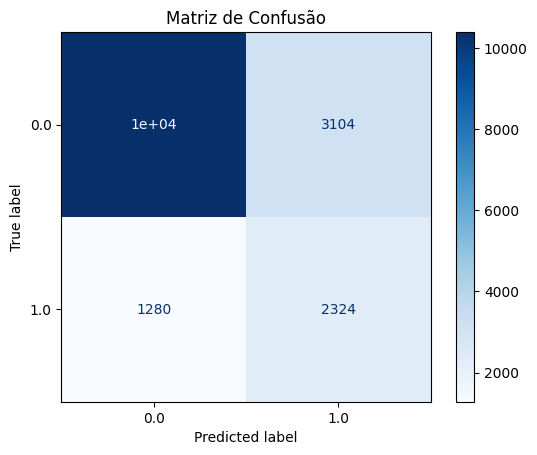

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


### Conclusão sobre o Modelo

Com base na **matriz de confusão** apresentada, no relatório de classificação e no contexto fornecido, podemos tirar as seguintes conclusões sobre o modelo de previsão de **bullying na escola**:

---

### Desempenho do Modelo:
1. **Acurácia Geral**:  
   O modelo obteve **74,3% de acurácia**, o que significa que ele está correto em aproximadamente 74% das previsões. Embora seja um bom valor, ele precisa ser analisado considerando o desequilíbrio entre as classes.

2. **Desempenho por Classe**:
   - **Classe 0 (Não sofreu bullying):**
     - **Precision (89%)**: 89% das previsões de "não sofreu bullying" estão corretas.
     - **Recall (77%)**: O modelo conseguiu identificar corretamente **77%** dos alunos que não sofreram bullying.
     - Esse desempenho é **robusto**, com boas métricas de precisão e recall.

   - **Classe 1 (Sofreu bullying):**
     - **Precision (43%)**: Apenas 43% das previsões de "sofreu bullying" estão corretas, indicando que o modelo tem dificuldade em ser preciso ao prever essa classe.
     - **Recall (64%)**: O modelo identificou **64%** dos alunos que realmente sofreram bullying. Embora não seja ideal, ele está capturando uma parte razoável dos casos positivos.
     - O modelo ainda apresenta dificuldades nessa classe, pois ela é **menos representada** (3604 casos contra 13491 da classe 0).

3. **Desequilíbrio de Classes**:  
   A base de dados apresenta um **desequilíbrio significativo** entre as classes:  
   - **Classe 0 (Não sofreu bullying)**: 13.491 ocorrências  
   - **Classe 1 (Sofreu bullying)**: 3.604 ocorrências  
   Esse desequilíbrio impacta diretamente o desempenho do modelo, que tende a favorecer a classe majoritária (classe 0).

---

### Interpretação da Matriz de Confusão:
- O modelo prevê **10.387 casos verdadeiros negativos** (TN), ou seja, não sofreu bullying e foi previsto corretamente.
- Existem **2.324 verdadeiros positivos** (TP), ou seja, alunos que sofreram bullying e o modelo previu corretamente.
- **3.104 falsos positivos** (FP): Alunos que não sofreram bullying, mas foram incorretamente classificados como vítimas.
- **1.280 falsos negativos** (FN): Alunos que sofreram bullying, mas o modelo não identificou.

---

### Pontos de Melhoria:
1. **Balanceamento das Classes**:  
   Para lidar com o desequilíbrio das classes, é possível:
   - Utilizar **técnicas de oversampling** (como SMOTE) ou **undersampling**.
   - Ajustar a métrica do modelo (como aumentar o peso da classe 1, o que já foi feito parcialmente usando `class_weight='balanced'`).

2. **Engenharia de Recursos**:  
   Explorar novas variáveis e combinações, como:
   - Criar indicadores compostos relacionados a sentimentos de solidão e interações sociais.
   - Utilizar variáveis relacionadas a peso (abaixo, acima e obeso), que podem ter correlação com o bullying.

3. **Avaliação de Modelos Alternativos**:  
   Experimentar outros algoritmos, como Random Forest, Gradient Boosting ou redes neurais, que podem capturar padrões não lineares nos dados.

4. **Ajuste de Hiperparâmetros**:  
   Refinar os parâmetros do modelo para melhorar a capacidade de previsão na classe minoritária.

---

### Conclusão Final:
O modelo apresenta um **bom desempenho geral** para a classe majoritária (não sofreu bullying), mas ainda precisa de melhorias significativas para a classe minoritária (sofreu bullying). Considerando o objetivo da pesquisa, que é prever e **prevenir o bullying**, é fundamental melhorar a **sensibilidade** (recall) na classe 1 para identificar mais casos verdadeiros de bullying e possibilitar intervenções eficazes.